# 📊 Инструментарий для анализа матриц

Добро пожаловать в интерактивный ноутбук для работы с пакетом **matrix_analysis**!

Этот ноутбук демонстрирует возможности модуля для построения и анализа специальной матрицы L. Вы можете запустить этот ноутбук локально или в Google Colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ruslan361/matrix_analys/blob/main/matrix_analysis_notebook.ipynb)

---

## 📑 Содержание

1. [Установка и импорт](#setup)
2. [Построение матрицы L](#build-matrix)
3. [Визуализация матрицы L](#visualize-l)
4. [Вычисление L×L^T](#compute-llt)
5. [Визуализация L×L^T](#visualize-llt)
6. [Анализ базисных строк](#basis-analysis)
7. [Анализ собственных значений](#eigenvalue-analysis)
8. [Анализ ранга матрицы](#rank-analysis)
9. [Характеристический многочлен](#characteristic-poly)
10. [Сохранение результатов](#save-results)
11. [Заключение](#conclusion)

---

<a id='setup'></a>
## 🔧 1. Установка и импорт

Первым шагом проверим среду выполнения и установим пакет `matrix_analysis`, если мы работаем в Google Colab.

### Автоматическое определение среды

In [165]:
# Check if running in Google Colab
import sys
import os
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("Запуск в Google Colab. Установка пакета matrix_analysis...")
    # Install the package directly from GitHub
    !pip install git+https://github.com/Ruslan361/matrix_analys.git
    # Replace YOUR_USERNAME with your actual GitHub username
else:
    print("Локальный запуск. Настройка путей...")
    # For local execution, we need to make sure the module is in the Python path

    # Method 1: Add the current directory to path (if matrix_analysis is in the same directory)
    current_dir = os.path.abspath(os.path.dirname('__file__'))
    if current_dir not in sys.path:
        sys.path.append(current_dir)
        print(f"Текущая директория добавлена в путь: {current_dir}")

    # Method 2: Check if we can find the matrix_analysis module
    module_dir = os.path.abspath(os.path.join(current_dir, 'matrix_analysis'))
    if os.path.exists(module_dir) and module_dir not in sys.path:
        sys.path.append(module_dir)
        print(f"Директория модуля добавлена в путь: {module_dir}")

    # Method 3: Go up one directory (fallback)
    from pathlib import Path
    parent_dir = str(Path.cwd().parent)
    if parent_dir not in sys.path:
        sys.path.append(parent_dir)
        print(f"Родительская директория добавлена в путь: {parent_dir}")

    print("Настройка путей завершена. Python будет искать модули в этих директориях.")

Запуск в Google Colab. Установка пакета matrix_analysis...
  Cloning https://github.com/Ruslan361/matrix_analys.git to /tmp/pip-req-build-4t919vpq
  Running command git clone --filter=blob:none --quiet https://github.com/Ruslan361/matrix_analys.git /tmp/pip-req-build-4t919vpq
  Resolved https://github.com/Ruslan361/matrix_analys.git to commit 9d9cab3e579cb6ea58abdd5136767e8732db9722
  Preparing metadata (setup.py) ... done


In [166]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Import functions from the matrix_analysis module
try:
    # This is how it would work after pip installing from GitHub
    from matrix_analysis.build_L_matrix import build_L_matrix
    from matrix_analysis.visualize_matrix import visualize_matrix
    from matrix_analysis.visualize_eigenvalues import visualize_eigenvalues
    from matrix_analysis.display_matrix_blocks import display_matrix_blocks
    from matrix_analysis.compute_matrix_rank import compute_matrix_rank
    from matrix_analysis.create_custom_colormap import create_custom_colormap
    from matrix_analysis.matrix_analysis_functions import save_characteristic_polynomial
    from matrix_analysis.save_matrix_to_file import save_matrix_to_file
except ImportError:
    # Fallback for local development with relative imports
    try:
        # For when running from the notebook's directory
        import sys
        import os
        # Add the parent directory to the path if running from notebook directory
        module_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), 'matrix_analysis'))
        if os.path.exists(module_dir) and module_dir not in sys.path:
            sys.path.append(module_dir)

        # Try importing directly from the module directory
        from build_L_matrix import build_L_matrix
        from visualize_matrix import visualize_matrix
        from visualize_eigenvalues import visualize_eigenvalues
        from display_matrix_blocks import display_matrix_blocks
        from compute_matrix_rank import compute_matrix_rank
        from create_custom_colormap import create_custom_colormap
        from matrix_analysis_functions import save_characteristic_polynomial
        from save_matrix_to_file import save_matrix_to_file
    except ImportError:
        # As a last resort, try importing with the package name
        try:
            from matrix_analysis.build_L_matrix import build_L_matrix
            from matrix_analysis.visualize_matrix import visualize_matrix
            from matrix_analysis.visualize_eigenvalues import visualize_eigenvalues
            from matrix_analysis.display_matrix_blocks import display_matrix_blocks
            from matrix_analysis.compute_matrix_rank import compute_matrix_rank
            from matrix_analysis.create_custom_colormap import create_custom_colormap
            from matrix_analysis.matrix_analysis_functions import save_characteristic_polynomial
            from matrix_analysis.save_matrix_to_file import save_matrix_to_file
        except ImportError:
            # Show a detailed error message
            print("ОШИБКА: Не удалось импортировать необходимые модули.")
            print("Если запускаете локально, пожалуйста, убедитесь, что:")
            print("1. Вы установили пакет с помощью 'pip install -e .'")
            print("2. Или директория 'matrix_analysis' находится в вашем Python path")
            print("\nПодробные инструкции по установке смотрите в файле README.md")

<a id='build-matrix'></a>
## 🔢 2. Построение матрицы L

Матрица L строится с помощью функции `build_L_matrix()` из модуля `matrix_analysis`. 

### ⚙️ Входные параметры

Определите пять параметров для построения матрицы:
- **n_1**: первый параметр структуры матрицы
- **n1, n2, n3, n4**: параметры, определяющие размеры блоков

Вы можете изменять эти значения для экспериментов с различными конфигурациями матриц.

In [167]:
# Matrix parameters
n_1 = 1  # You can change these values
n1 = 2
n2 = 3
n3 = 5
n4 = 7

print(f"Параметры матрицы: n_1={n_1}, n1={n1}, n2={n2}, n3={n3}, n4={n4}")

Параметры матрицы: n_1=1, n1=2, n2=3, n3=5, n4=7


### 🏗️ Построение матрицы

Функция `build_L_matrix()` создаёт матрицу L специальной структуры и возвращает:
- **L**: саму матрицу
- **block_coords**: координаты блоков для визуализации

In [168]:
# Build the L matrix
L, block_coords = build_L_matrix(n_1, n1, n2, n3, n4)

print(f"Создана матрица L с размерами: {L.shape}")
print(f"Количество блоков: {len(block_coords)}")

Создана матрица L с размерами: (101, 247)
Количество блоков: 4


<a id='visualize-l'></a>
## 🎨 3. Визуализация матрицы L

Визуализация матрицы помогает понять её структуру и блочную организацию. 

Мы используем пользовательскую цветовую схему:
- 🔴 **Красный** — положительные значения
- ⚪ **Белый** — нулевые значения
- 🔵 **Синий** — отрицательные значения

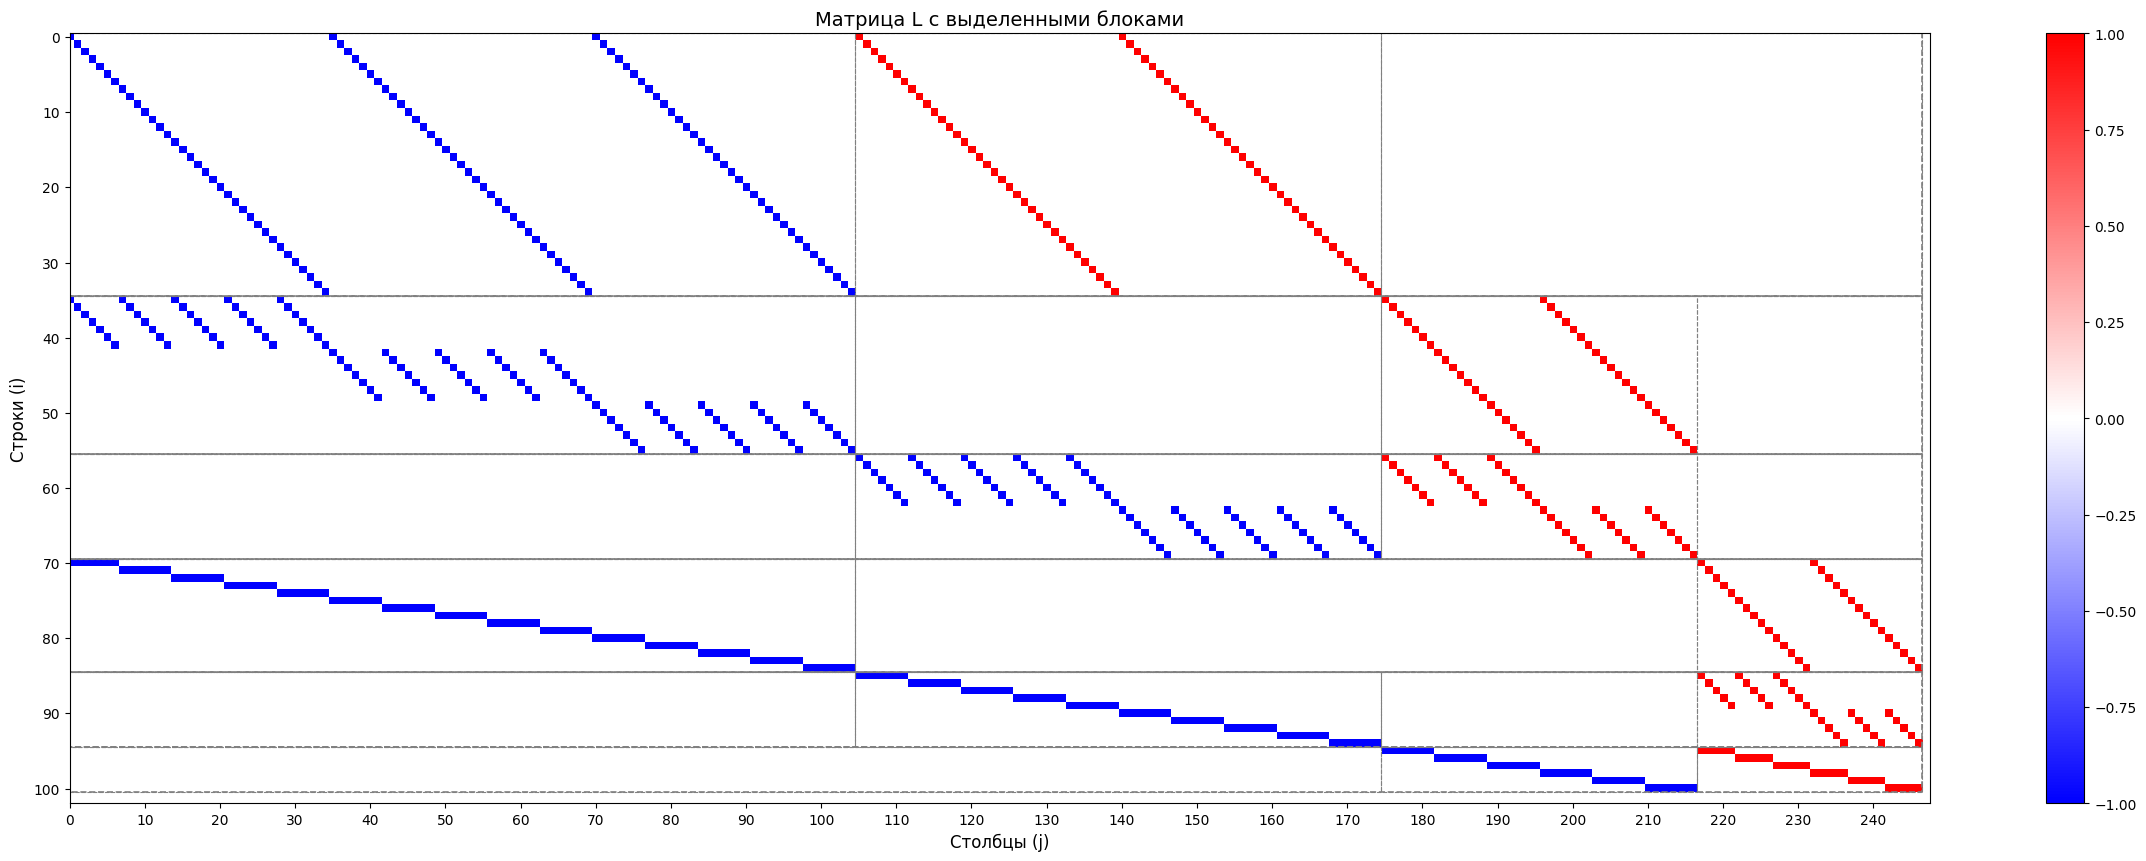

In [169]:
# Create figure for visualization
plt.figure(figsize=(30, 10))

# Apply our custom colormap
plt.imshow(L, cmap=create_custom_colormap(L))
plt.colorbar()
plt.clim(-1, 1)

# Configure the plot
plt.axis('equal')
plt.xlim(0.5, L.shape[1] + 0.5)
plt.ylim(0.5, L.shape[0] + 0.5)
plt.gca().invert_yaxis()  # Flip Y axis so rows go from top to bottom

# Add rectangular areas to highlight blocks
display_matrix_blocks(L, block_coords)

# Set titles and labels
plt.title('Матрица L с выделенными блоками', fontsize=14)
plt.xlabel('Столбцы (j)', fontsize=12)
plt.ylabel('Строки (i)', fontsize=12)
plt.grid(False)
plt.box(True)
plt.xticks(np.arange(0, L.shape[1], step=10))
plt.yticks(np.arange(0, L.shape[0], step=10))
# Display the plot
plt.show()

<a id='compute-llt'></a>
## 🧮 4. Вычисление L×L^T

Матрица **L×L^T** является важным объектом анализа. Это симметричная положительно определённая матрица, которая содержит информацию о:
- Скалярных произведениях строк матрицы L
- Геометрических свойствах пространства строк

Вычислим транспонированную матрицу L^T и их произведение:

In [170]:
# Calculate L*L^T
Lt = L.T
L_LT = L @ Lt

print(f"Создана матрица L*L^T с размерами: {L_LT.shape}")

Создана матрица L*L^T с размерами: (101, 101)


<a id='visualize-llt'></a>
## 🎨 5. Визуализация L×L^T

Визуализируем полученную матрицу L×L^T с использованием тепловой карты.

Обратите внимание на симметричность матрицы относительно главной диагонали.

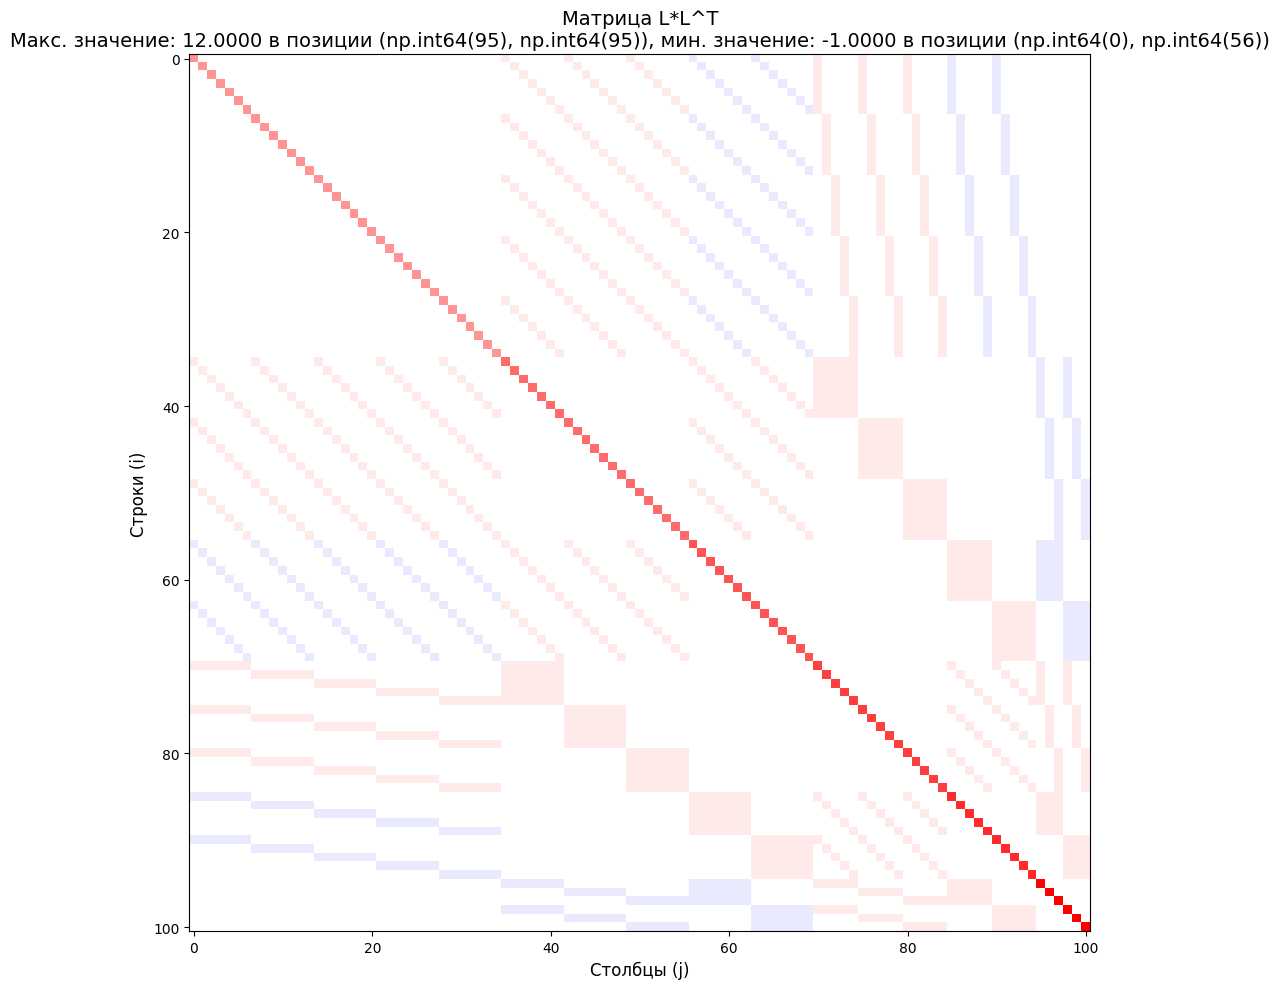

/tmp/ipython-input-3735968233.py:4: UserWarning: Adding colorbar to a different Figure <Figure size 1000x1000 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(im, ax=ax)


<Figure size 640x480 with 0 Axes>

In [171]:
# Visualize L*L^T matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = visualize_matrix(L_LT, 'Матрица L*L^T', create_custom_colormap, None, True, ax=ax)
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

<a id='basis-analysis'></a>
## 🔍 6. Анализ базисных строк матрицы L

С помощью библиотеки SymPy найдём базисные строки матрицы L:
- Транспонируем матрицу L
- Приведём к улучшенному ступенчатому виду (RREF)
- Найдём индексы опорных столбцов

Эти индексы соответствуют номерам строк в исходной матрице L, которые образуют базис.

In [175]:
import sympy
# 2. Транспонируем L и преобразуем в формат SymPy
L_T_sympy = sympy.Matrix(L.T)
# 3. Находим улучшенный ступенчатый вид и, что важнее, ИНДЕКСЫ ОПОРНЫХ СТОЛБЦОВ
_, pivot_indices_tuple = L_T_sympy.rref()
pivot_indices = list(pivot_indices_tuple)

# 4. Эти индексы - это номера строк в ИСХОДНОЙ матрице L, которые образуют базис.
# Выбираем эти строки из оригинальной numpy-матрицы L.
basis_from_original_L = L[pivot_indices, :]

print(f"Найдены {len(pivot_indices)} базисных строк. Их индексы в исходной матрице L:")
print(pivot_indices)
print("\n" + "="*50 + "\n")

print(f"Базисная система строк (состоит из {basis_from_original_L.shape[0]} строк, выбранных из L):")
# np.set_printoptions(suppress=True) # Для более чистого вывода
print(basis_from_original_L)

Найдены 85 базисных строк. Их индексы в исходной матрице L:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 95, 96]


Базисная система строк (состоит из 85 строк, выбранных из L):
[[-1. -0. -0. ...  0.  0.  0.]
 [-0. -1. -0. ...  0.  0.  0.]
 [-0. -0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


<a id='eigenvalue-analysis'></a>
## 📈 7. Анализ собственных значений

Собственные значения матрицы L×L^T несут важную информацию о её свойствах:
- **Наибольшее собственное значение** указывает на максимальную дисперсию данных
- **Распределение собственных значений** показывает, насколько "растянуто" пространство в разных направлениях

### Вычисление собственных значений и векторов

In [176]:
# Calculate eigenvalues and eigenvectors
eigenvalues_LLT, V_LLT = np.linalg.eigh(L_LT)
print(V_LLT)

# Sort eigenvalues in descending order
sorted_idx = np.argsort(eigenvalues_LLT)[::-1]
sorted_eigenvalues = eigenvalues_LLT[sorted_idx]
sorted_eigenvectors = V_LLT[:, sorted_idx]

# Display the top 10 eigenvalues
print("Первые 10 собственных значений L*L^T (округленные до целых):")
for i, val in enumerate(sorted_eigenvalues[:10]):
    print(f"  λ{i+1} = {int(round(val.real))}") # Используем .real и округляем до целого

# Расчет спектра собственных значений (уникальные значения и их кратности)
eigenvalue_counts = {}
for eig_val in sorted_eigenvalues:
    # Округляем, чтобы сгруппировать близкие значения, затем приводим к int
    # Используем .real на случай, если собственные значения окажутся комплексными (хотя для L*L^T они должны быть вещественными)
    processed_eig_val = int(round(eig_val.real))
    if processed_eig_val in eigenvalue_counts:
        eigenvalue_counts[processed_eig_val] += 1
    else:
        eigenvalue_counts[processed_eig_val] = 1

print("\nСпектр собственных значений (значение: кратность):")
# Сортируем по значению для более наглядного вывода
for eig_val, count in sorted(eigenvalue_counts.items(), key=lambda item: item[0], reverse=True):
    print(f"  {eig_val}: {count}")

# Проверка зануления собственных значений после 58-го (согласно предположению)
if len(sorted_eigenvalues) > 58:
    print("\nПроверка собственных значений после 58-го (округленные до целых):")
    all_zero_after_58 = True
    for i in range(58, len(sorted_eigenvalues)):
        val_int = int(round(sorted_eigenvalues[i].real))
        print(f"  λ{i+1} = {val_int}")
        if val_int != 0:
            all_zero_after_58 = False
    if all_zero_after_58:
        print("Все собственные значения после 58-го (включительно) равны 0 (после округления).")
    else:
        print("Не все собственные значения после 58-го равны 0 (после округления).")
else:
    print("\nКоличество собственных значений меньше или равно 58, проверка зануления после 58-го неактуальна.")

[[ 0.00000000e+00  0.00000000e+00 -4.98322207e-35 ...  2.98526267e-41
  -9.16698497e-02  2.86056153e-16]
 [ 1.99955465e-02  8.94448922e-02  2.22742000e-01 ...  3.45913640e-17
  -9.16698497e-02  2.41260574e-16]
 [-2.44807775e-02  1.09643693e-01  8.94324583e-02 ...  8.09231190e-17
  -9.16698497e-02  4.34399411e-16]
 ...
 [ 4.89360401e-02  3.19197738e-03 -1.13680498e-01 ... -3.26720018e-01
  -3.25986818e-16 -1.04408280e-01]
 [-5.05881657e-02 -2.71872309e-02 -5.67179435e-02 ... -3.26720018e-01
  -3.24858044e-16 -1.04408280e-01]
 [ 9.69663559e-02 -4.54419100e-02 -8.01201663e-02 ... -3.26720018e-01
  -3.25002557e-16 -1.04408280e-01]]
Первые 10 собственных значений L*L^T (округленные до целых):
  λ1 = 17
  λ2 = 17
  λ3 = 17
  λ4 = 15
  λ5 = 15
  λ6 = 14
  λ7 = 14
  λ8 = 14
  λ9 = 14
  λ10 = 12

Спектр собственных значений (значение: кратность):
  17: 3
  15: 2
  14: 4
  12: 10
  10: 16
  9: 8
  8: 6
  7: 12
  5: 24
  0: 16

Проверка собственных значений после 58-го (округленные до целых):
  λ

### 📊 Визуализация собственных значений

График собственных значений в порядке убывания:

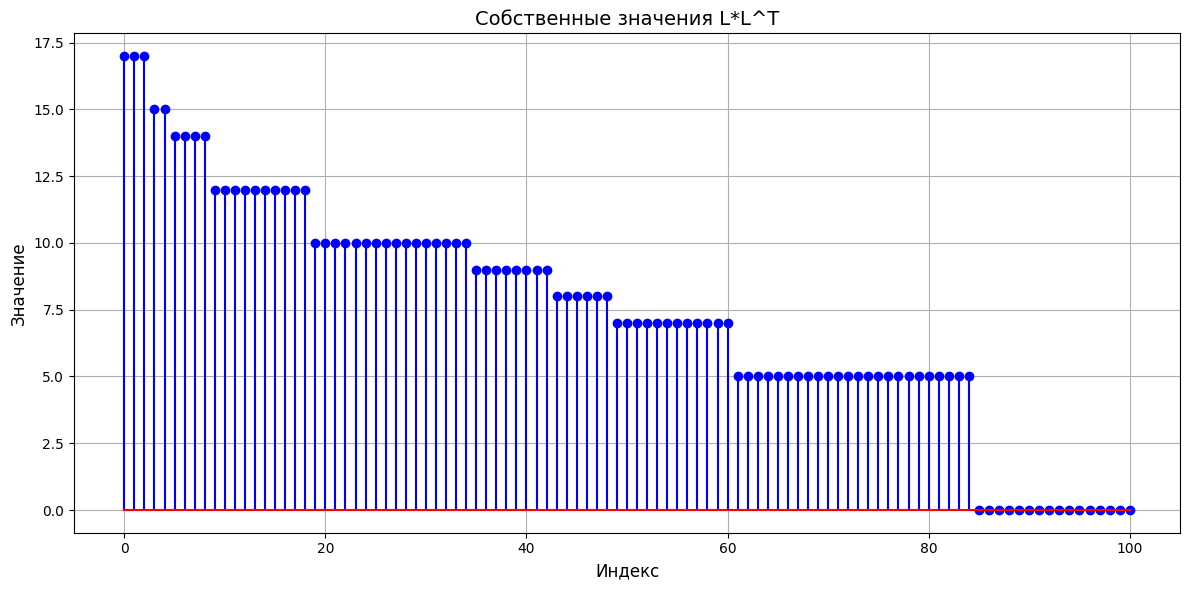

<Figure size 640x480 with 0 Axes>

In [177]:
# Visualize eigenvalues
fig, ax = plt.subplots(figsize=(12, 6))
line = visualize_eigenvalues(sorted_eigenvalues, 'Собственные значения L*L^T', None, ax=ax) # Title translated
plt.tight_layout()
plt.show()

<a id='rank-analysis'></a>
## 📏 8. Анализ ранга матрицы

**Ранг матрицы** — это максимальное количество линейно независимых строк (или столбцов).

Для матрицы размером m×n ранг не может превышать min(m, n).

Вычислим ранг для обеих матриц:

In [178]:
# Compute matrix ranks
matrix_rank_L = compute_matrix_rank(L)
matrix_rank_LLT = compute_matrix_rank(L_LT)

print(f"Ранг матрицы L: {matrix_rank_L}")
print(f"Ранг матрицы L*L^T: {matrix_rank_LLT}")
print(f"\nПримечание: Для матрицы размером {L.shape}, максимально возможный ранг равен {min(L.shape)}")

Ранг матрицы L: 85
Ранг матрицы L*L^T: 85

Примечание: Для матрицы размером (101, 247), максимально возможный ранг равен 101


<a id='characteristic-poly'></a>
## 📐 9. Характеристический многочлен

**Характеристический многочлен** матрицы A определяется как det(A - λI), где λ — собственное значение.

Коэффициенты этого многочлена связаны со следом, определителем и другими инвариантами матрицы.

In [179]:
# Calculate characteristic polynomial coefficients using numpy's poly function
# This is more stable than direct calculation for large matrices
poly_coeffs = np.poly(eigenvalues_LLT)

# Print the first few coefficients
print("Первые 5 коэффициентов характеристического многочлена (старшие степени):")
for i, coef in enumerate(poly_coeffs[:5]):
    power =  i
    print(f"a{power} = {coef:.6g}")

Первые 5 коэффициентов характеристического многочлена (старшие степени):
a0 = 1
a1 = -741
a2 = 270860
a3 = -6.51115e+07
a4 = 1.15784e+10


<a id='save-results'></a>
## 💾 10. Сохранение результатов

В этом разделе мы можем сохранить результаты анализа в файлы. 

⚠️ **Примечание**: В Google Colab файлы будут сохранены во временное хранилище и будут удалены после закрытия сессии. Для сохранения на Google Drive используйте соответствующие команды монтирования.

### Проверка прав на запись

In [181]:
#input("Нажмите Enter для продолжения...")
# Define a function to check if we can write to the current directory
def can_write_to_directory():
    try:
        test_file = 'test_write_permission.txt'
        with open(test_file, 'w') as f:
            f.write('test')
        os.remove(test_file)
        return True
    except:
        return False

# Check if we can write to the current directory
can_write = can_write_to_directory()

if can_write:
    print("Есть права на запись. Сохранение результатов в файлы...")

    # Save the L matrix to a text file
    L_txt_filename = 'matrix_L.txt'
    with open(L_txt_filename, 'w') as f:
        f.write(f'# Матрица L размером {L.shape[0]}x{L.shape[1]}\n')
        for i in range(L.shape[0]):
            for j in range(L.shape[1]):
                f.write(f'{int(round(L[i,j]))} ') # Output as integer
            f.write('\n')
    print(f"Матрица L сохранена в: {L_txt_filename}")

    # Save the L*L^T matrix to a text file
    L_LT_txt_filename = 'matrix_L_LT.txt'
    with open(L_LT_txt_filename, 'w') as f:
        f.write(f'# Матрица L*L^T размером {L_LT.shape[0]}x{L_LT.shape[1]}\n')
        for i in range(L_LT.shape[0]):
            for j in range(L_LT.shape[1]):
                f.write(f'{int(round(L_LT[i,j]))} ') # Output as integer
            f.write('\n')
    print(f"Матрица L*L^T сохранена в: {L_LT_txt_filename}")

    # Save eigenvalues to a text file
    eigen_filename = 'eigenvalues_L_LT.txt'
    with open(eigen_filename, 'w') as f:
        f.write('АНАЛИЗ СОБСТВЕННЫХ ЗНАЧЕНИЙ МАТРИЦЫ L*L^T\n')
        f.write('===========================================\n\n')
        f.write(f'Дата: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}\n\n')
        f.write(f'РАЗМЕР МАТРИЦЫ: {L_LT.shape[0]} x {L_LT.shape[1]}\n\n')
        f.write(f'РАНГ МАТРИЦЫ: {matrix_rank_LLT}\n\n')
        f.write('СОБСТВЕННЫЕ ЗНАЧЕНИЯ (отсортированы по убыванию):\n')
        f.write('========================================================\n\n')

        for i, val in enumerate(sorted_eigenvalues):
            f.write(f'  λ{i+1} = {int(round(val.real))}\n') # Output as integer
    print(f"Собственные значения сохранены в: {eigen_filename}")

    # Save matrix rank to a text file
    rank_filename = 'matrix_rank.txt'
    with open(rank_filename, 'w') as f:
        f.write('АНАЛИЗ РАНГА МАТРИЦЫ\n')
        f.write('===========================================\n\n')
        f.write(f'Дата: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}\n\n')
        f.write(f'Размер матрицы L: {L.shape[0]} x {L.shape[1]}\n')
        f.write(f'Размер матрицы L*L^T: {L_LT.shape[0]} x {L_LT.shape[1]}\n\n')
        f.write(f'Ранг матрицы L: {matrix_rank_L}\n')
        f.write(f'Ранг матрицы L*L^T: {matrix_rank_LLT}\n\n')
        f.write('Примечание: Ранг матрицы - это количество линейно независимых строк или столбцов.\n')
        f.write('Для симметричной матрицы, такой как L*L^T, ранг равен количеству ненулевых собственных значений.\n')
    print(f"Информация о ранге матриц сохранена в: {rank_filename}")

    # List of created files
    print("\nСозданные файлы:")
    print(f"  - {L_txt_filename} - Матрица L в текстовом формате")
    print(f"  - {L_LT_txt_filename} - Матрица L*L^T в текстовом формате")
    print(f"  - {eigen_filename} - Собственные значения L*L^T")
    print(f"  - {rank_filename} - Информация о ранге матриц")
else:
    print("Нет прав на запись в этой среде (часто бывает в Google Colab).")
    print("Результаты не были сохранены в файлы, но вы можете скачать сгенерированные изображения вручную.")

Есть права на запись. Сохранение результатов в файлы...
Матрица L сохранена в: matrix_L.txt
Матрица L*L^T сохранена в: matrix_L_LT.txt
Собственные значения сохранены в: eigenvalues_L_LT.txt
Информация о ранге матриц сохранена в: matrix_rank.txt

Созданные файлы:
  - matrix_L.txt - Матрица L в текстовом формате
  - matrix_L_LT.txt - Матрица L*L^T в текстовом формате
  - eigenvalues_L_LT.txt - Собственные значения L*L^T
  - matrix_rank.txt - Информация о ранге матриц


<a id='conclusion'></a>
## 🎓 11. Заключение

В этом ноутбуке мы продемонстрировали ключевые возможности модуля **matrix_analysis**:

✅ **Построение** специализированной матрицы L с настраиваемыми параметрами  
✅ **Визуализация** структуры матрицы с использованием пользовательских цветовых схем  
✅ **Вычисление и анализ** матрицы L×L^T  
✅ **Анализ базисных строк** с помощью SymPy  
✅ **Вычисление собственных значений** и их визуализация  
✅ **Определение ранга** матрицы  
✅ **Расчёт характеристического многочлена**  
✅ **Сохранение результатов** для дальнейшего анализа  

---

### 🚀 Дальнейшие шаги

Вы можете использовать этот ноутбук как отправную точку для собственного анализа:

1. **Экспериментируйте** с различными значениями параметров n_1, n1, n2, n3, n4
2. **Изучайте** влияние параметров на структуру и свойства матрицы
3. **Расширяйте функциональность**, добавляя новые виды анализа

---

### 📚 Дополнительные ресурсы

- [Документация NumPy](https://numpy.org/doc/)
- [Документация Matplotlib](https://matplotlib.org/)
- [Документация SymPy](https://docs.sympy.org/)

---

**Спасибо за использование Matrix Analysis Toolkit!** 💙